In [45]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix,  
    plot_confusion_matrix, accuracy_score, precision_score,       recall_score, f1_score)
import numpy as np
import statistics
import matplotlib.pyplot as plt
import pickle


In [46]:
path = '/Users/jennifer/Downloads/KNN_Model_Stuff/' 

X_train_path = path + 'train_features.csv'
y_train_path = path + 'train_labels.csv'
X_test_path = path + 'test_features.csv'
y_test_path = path + 'test_labels.csv'

X_train = pd.read_csv(X_train_path)
y_train = pd.read_csv(y_train_path)
X_test = pd.read_csv(X_test_path)
y_test = pd.read_csv(y_test_path)

In [47]:
for nn_neighbors in range(1, 31):
  knn = KNeighborsClassifier(n_neighbors=nn_neighbors, weights='distance')
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  print("Recall (%) for kNN with ", nn_neighbors, " nearest neighbors is: ", round(recall * 100,2))

Recall (%) for kNN with  1  nearest neighbors is:  55.49
Recall (%) for kNN with  2  nearest neighbors is:  55.49
Recall (%) for kNN with  3  nearest neighbors is:  54.88
Recall (%) for kNN with  4  nearest neighbors is:  56.1
Recall (%) for kNN with  5  nearest neighbors is:  55.49
Recall (%) for kNN with  6  nearest neighbors is:  54.88
Recall (%) for kNN with  7  nearest neighbors is:  55.49
Recall (%) for kNN with  8  nearest neighbors is:  54.88
Recall (%) for kNN with  9  nearest neighbors is:  54.88
Recall (%) for kNN with  10  nearest neighbors is:  54.88
Recall (%) for kNN with  11  nearest neighbors is:  54.27
Recall (%) for kNN with  12  nearest neighbors is:  53.66
Recall (%) for kNN with  13  nearest neighbors is:  54.27
Recall (%) for kNN with  14  nearest neighbors is:  54.27
Recall (%) for kNN with  15  nearest neighbors is:  54.27
Recall (%) for kNN with  16  nearest neighbors is:  54.27
Recall (%) for kNN with  17  nearest neighbors is:  53.05
Recall (%) for kNN with 

In [48]:
knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Recall (%) for kNN with ", nn_neighbors, " nearest neighbors is: ", round(recall * 100,2))
KNN_results = pd.DataFrame(y_pred)
KNN_results.to_csv(path + 'KNN_results.csv', index=False)

Recall (%) for kNN with  30  nearest neighbors is:  56.1


In [49]:
print(confusion_matrix(y_test, y_pred))

[[90710  3967]
 [   72    92]]


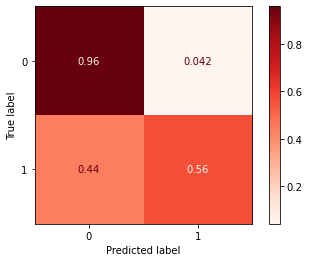

In [58]:
plot_confusion_matrix(knn, X_test, y_test, normalize='true', 
        include_values=True, cmap='Reds')
plt.savefig('tree_confusion.png', dpi=300, bbox_inches='tight')

In [59]:
pickle.dump(knn, open("knn_model.pkl","wb"))